In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

from standaloneSimulation import *

In [45]:

#Definition av rum
#Grid på 1000 x 1000
#En pixel är 0.2 x 0.2 m i verkligheten total utsträckning på 1 km

#Definition av tid
#Season lenght = 112000
#Vi räknar med att ett bi max lever 8 veckor
#En dag är 2000 tidssteg

def run_model(size, numStartingBees, numStartingFlowers, seasonLength, iterations):

    beesim = BeeSimulation(size, numStartingBees, numStartingFlowers, seasonLength)

    clustering_coefficients = []
    min_radius = 10
    vor = None
    positions = [(flower.x, flower.y) for flower in beesim.environment.flowers]
    vor_init = Voronoi(positions)
    for _ in range(iterations):
        beesim.Update()
        if beesim.timestep % seasonLength ==0:
            positions = [(flower.x, flower.y) for flower in beesim.environment.flowers]
            vor = Voronoi(positions)
            clustering_coefficients.append(clustering(vor, len(beesim.environment.flowers), min_radius))
    
    positions = [(flower.x, flower.y) for flower in beesim.environment.flowers]
    
    vor = Voronoi(positions)
        

    return vor_init, vor, clustering_coefficients
        
def clustering(vor, N, min_radius):
    valid_count = 0
    for region in vor.regions:
        if not -1 in region and len(region) > 2:
            polygon_points = vor.vertices[region]
            area = 0.5 * np.abs(np.dot(polygon_points[:, 0], np.roll(polygon_points[:, 1], 1)) - np.dot(np.roll(polygon_points[:, 0], 1), polygon_points[:, 1]))
            if area < np.pi*(min_radius**2):
                valid_count += 1

    clustering_coefficient = valid_count / N
    return clustering_coefficient

def plot_clustering(size, numStartingBees, numStartingFlowers, seasonLength, n_days):

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    vor_init, vor, clustering_coefficients = run_model(size, numStartingBees, numStartingFlowers, seasonLength, n_days)

    # Plot Voronoi plot in the first column
    voronoi_plot_2d(vor_init, ax=axes[0], show_vertices=False, line_colors='lightblue', line_width=2, line_alpha=0.6, point_size=8)
    axes[0].set_title('Initial configuration')
    axes[0].set_xlim(0, size)  
    axes[0].set_ylim(0, size)  

    # Plot Voronoi plot in the second column
    voronoi_plot_2d(vor, ax=axes[1], show_vertices=False, line_colors='lightblue', line_width=2, line_alpha=0.6, point_size=8)
    axes[1].set_title('Final configuration')
    axes[1].set_xlim(0, size)  
    axes[1].set_ylim(0, size)    

    axes[2].plot(clustering_coefficients[:], label='Clustering')
    axes[2].legend()

    plt.tight_layout()

    # Show the plots
    plt.show()


An environment has been created of type: 'countryside'
RIP: bee died of starvation.
RIP: bee died of starvation.
RIP: bee died of age: 12 days. Pollen levels: {5: 22, 2: 1, 3: 3}
RIP: bee died of age: 19 days. Pollen levels: {5: 5, 1: 31}
RIP: bee died of age: 20 days. Pollen levels: {5: 8, 4: 8, 3: 4, 2: 3}
RIP: bee died of age: 23 days. Pollen levels: {5: 3, 4: 0, 1: 21, 3: 11}
RIP: bee died of age: 26 days. Pollen levels: {5: 19, 3: 6}
RIP: bee died of age: 28 days. Pollen levels: {1: 9, 5: 12}
RIP: bee died of age: 32 days. Pollen levels: {1: 19}
RIP: bee died of age: 51 days. Pollen levels: {4: 21, 3: 0}


KeyboardInterrupt: 

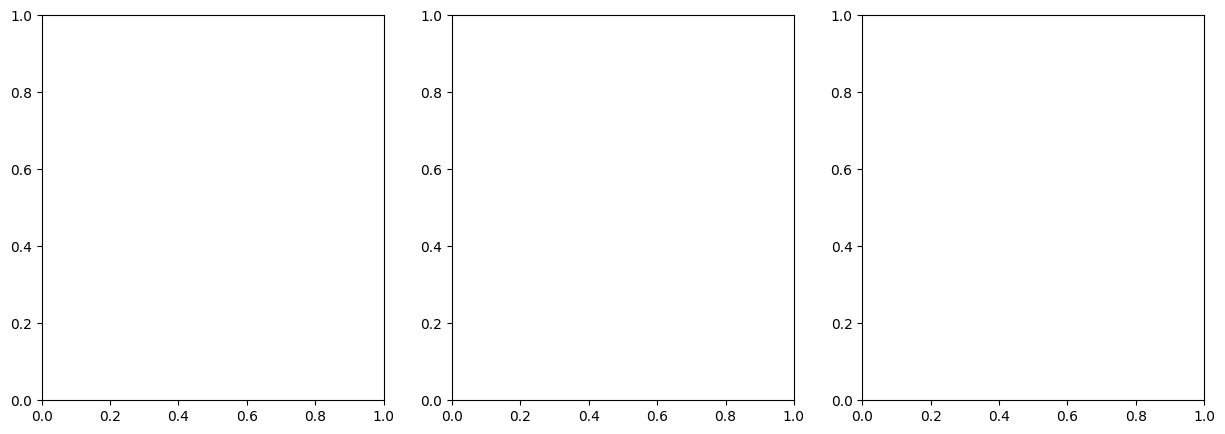

In [48]:
size = 1000
numStartingBees = 10
numStartingFlowers = 2000
seasonLength = 1000
iterations = (seasonLength)*2
plot_clustering(size, numStartingBees, numStartingFlowers, seasonLength, iterations)